In [1]:
import pickle
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
import utils.utils as utils

exp = utils.Load_Experiments("../Examples/Xs.pkl")

pd.set_option('display.max_rows', None)

with open('results_5G.pkl', 'rb') as f:
    res = pickle.load(f)
print(res[0]['param'].keys())

df = pd.DataFrame([[str(np.array(res[data]['param']['X'], dtype=int)),
                        res[data]['param']['DIGESTMOD'],
                        res[data]['param']['QUALITY'],
                        res[data]['param']['PAYLOAD_SIZE_BYTE'],
                        res[data]['param']['ATTACK_PROBABILITY'],
                        np.nanmean(res[data]['goodput']), 
                        np.nanmean(res[data]['avg_verification']), 
                        np.nanmean(res[data]['latency']) - res[data]['param']['OFFSET'], 
                        np.nanmean(res[data]['frame_rate']) ] for data in res.keys()]
                        , columns=['X', 'DIGESTMOD', 'QUALITY', 'PAYLOAD_SIZE_BYTE', 'ATTACK_PROBABILITY', 'goodput', 'avg_verification', 'latency', 'frame_rate'])
df.columns
df['X'].unique()

dict_keys(['X', 'Y', 'KEY', 'DIGESTMOD', 'PAYLOAD_SIZE_BYTE', 'QUALITY', 'ATTACK_PROBABILITY', 'DURATION', 'DELAY', 'OFFSET'])


/var/folders/1r/ph1yw3353jb398m67yh849kc0000gn/T/ipykernel_55936/1167536717.py:24: RuntimeWarning: Mean of empty slice
  np.nanmean(res[data]['frame_rate']) ] for data in res.keys()]
/var/folders/1r/ph1yw3353jb398m67yh849kc0000gn/T/ipykernel_55936/1167536717.py:23: RuntimeWarning: Mean of empty slice
  np.nanmean(res[data]['latency']) - res[data]['param']['OFFSET'],


array(['[[0 0 1 0 0]\n [0 0 0 0 1]\n [1 0 0 0 0]\n [0 0 1 0 0]\n [0 0 0 0 1]\n [0 1 0 0 0]\n [1 0 0 0 0]\n [1 0 0 0 0]\n [0 0 1 0 0]\n [0 0 0 1 0]\n [0 0 0 0 1]\n [1 0 0 0 0]\n [0 0 0 1 0]\n [0 1 0 0 0]\n [0 1 0 0 0]\n [0 0 0 1 0]\n [0 1 0 0 0]\n [0 0 1 0 0]\n [0 0 0 1 0]\n [0 0 0 0 1]]',
       '[[0 0 0 0 1]\n [0 1 0 0 0]\n [0 0 0 0 1]\n [0 1 0 0 0]\n [1 0 0 0 0]\n [0 1 0 0 0]\n [0 0 0 1 0]\n [1 0 0 0 0]\n [1 0 0 0 0]\n [0 0 0 1 0]\n [0 0 1 0 0]\n [0 0 1 0 0]\n [1 0 0 0 0]\n [0 1 0 0 0]\n [0 0 1 0 0]\n [0 0 0 0 1]\n [0 0 0 1 0]\n [0 0 1 0 0]\n [0 0 0 1 0]\n [0 0 0 0 1]]',
       '[[0 1 0 0 0]\n [0 1 0 0 0]\n [1 0 0 0 0]\n [0 0 0 0 1]\n [1 0 0 0 0]\n [0 0 1 0 0]\n [0 1 0 0 0]\n [1 0 0 0 0]\n [0 0 1 0 0]\n [0 0 0 1 0]\n [0 0 0 1 0]\n [1 0 0 0 0]\n [0 0 1 0 0]\n [0 0 0 1 0]\n [0 1 0 0 0]\n [0 0 0 0 1]\n [0 0 1 0 0]\n [0 0 0 0 1]\n [0 0 0 1 0]\n [0 0 0 0 1]]',
       '[[1 1 1 1 1]\n [1 1 1 1 1]\n [1 1 1 1 1]\n [1 1 1 1 1]\n [1 1 1 1 1]\n [1 1 1 1 1]\n [1 1 1 1 1]\n [1 1 1 1 1]\n [1 1 1 1 

In [2]:
from utils import Auth

for x in df['X'].unique():

    if x == str(np.array(np.eye(20), dtype=int)):
        df['X'].replace(x, 'Trad.', inplace=True)
    if x == str(np.array(Auth.ProMAC_X(20,4), dtype=int)):
        df['X'].replace(x, 'ProMAC 4', inplace=True)
        df.update(df[df['X'] == 'ProMAC 4']['avg_verification'].apply(lambda x: x * 1/4))
    if x == str(np.array(Auth.ProMAC_X(20,3), dtype=int)):
        df['X'].replace(x, 'ProMAC 3', inplace=True)
        df.update(df[df['X'] == 'ProMAC 3']['avg_verification'].apply(lambda x: x * 1/3))
    if x == str(np.array(Auth.ProMAC_X(20,2), dtype=int)):
        df['X'].replace(x, 'ProMAC 2', inplace=True)
        df.update(df[df['X'] == 'ProMAC 2']['avg_verification'].apply(lambda x: x * 1/2))
    if x == str(np.array(Auth.X, dtype=int)):
        df['X'].replace(x, '2D MAC', inplace=True)
    if x == '[[1 0 0 0 0 0 0 0 0 0]\n [1 0 0 0 0 0 0 0 0 0]\n [1 0 0 0 0 0 0 0 0 0]\n [0 1 0 0 0 0 0 0 0 0]\n [0 1 0 0 0 0 0 0 0 0]\n [0 1 0 0 0 0 0 0 0 0]\n [0 0 1 0 0 0 0 0 0 0]\n [0 0 1 0 0 0 0 0 0 0]\n [0 0 1 0 0 0 0 0 0 0]\n [0 0 0 1 0 0 0 0 0 0]\n [0 0 0 1 0 0 0 0 0 0]\n [0 0 0 1 0 0 0 0 0 0]\n [0 0 0 0 1 0 0 0 0 0]\n [0 0 0 0 1 0 0 0 0 0]\n [0 0 0 0 1 0 0 0 0 0]\n [0 0 0 0 0 1 0 0 0 0]\n [0 0 0 0 0 1 0 0 0 0]\n [0 0 0 0 0 1 0 0 0 0]\n [0 0 0 0 0 0 1 0 0 0]\n [0 0 0 0 0 0 1 0 0 0]\n [0 0 0 0 0 0 1 0 0 0]\n [0 0 0 0 0 0 0 1 0 0]\n [0 0 0 0 0 0 0 1 0 0]\n [0 0 0 0 0 0 0 1 0 0]\n [0 0 0 0 0 0 0 0 1 0]\n [0 0 0 0 0 0 0 0 1 0]\n [0 0 0 0 0 0 0 0 1 0]\n [0 0 0 0 0 0 0 0 0 1]\n [0 0 0 0 0 0 0 0 0 1]\n [0 0 0 0 0 0 0 0 0 1]]':
        df['X'].replace(x, '1D MAC', inplace=True)
    if x == str(np.eye(30, dtype=int)):
        df['X'].replace(x, 'Trad. 30', inplace=True)

for x in df['X'].unique():
    for e in exp:
        if x in str(np.array(exp[e]['results']['X'], dtype=int)):
            df['X'].replace(x, str(np.round(1-exp[e]['parameters']['p'],2)) + " optimal, " + f"m_nr: {exp[e]['parameters']['m_nr']}, t_nr: {exp[e]['parameters']['t_nr']}", inplace=True) 

# remove the test case
df = df[df['X']!='Trad. 30']

# remove any rows with df['X'] value of str(np.array(np.eye(10), dtype=int)
# df = df[df['X'] != str(np.array(np.eye(10), dtype=int))]

# select only the attack probability bigger than .05

# df = df[df['ATTACK_PROBABILITY'] > .05]    


# average of avg-verification, goodput, latency, frame_rate for each X categorized by ATTACK_PROBABILITY, PAYLOAD_SIZE_BYTE, DIGESTMOD
                
# multiply the avg_verification with the DigestMOD int value
df['avg_verification'] = df['avg_verification'] * df['DIGESTMOD'].apply(lambda x: int(x[-3:]) if x != 'sha1' else 128)
df = df[df['PAYLOAD_SIZE_BYTE'] <128]



df['optimal'] = df['X'].apply(lambda x: float(x.split(',')[0].split(' ')[0]) if 'optimal' in x else -1)
df['m_nr'] = df['X'].apply(lambda x: int(x.split(',')[1].split(' ')[2]) if 'optimal' in x else 30)
df['t_nr'] = df['X'].apply(lambda x: int(x.split(',')[2].split(' ')[2]) if 'optimal' in x else 30)
# df['t_nr'] = df['X'].apply(lambda x: 10 if '1D MAC' in x else )



df['t_nr'] = np.concatenate([df["1D MAC"  != df['X']]['t_nr'] ,df["1D MAC"  == df['X']]['t_nr'].apply(lambda x: 10)])
# df['t_nr'].where(df['X'] == '1D MAC', 10, inplace=True)
df['ratio'] = df['t_nr']/df['m_nr']

df_classic = df[df['X'].isin(['Trad.', '2D MAC', '1D MAC', 'ProMAC 4', 'ProMAC 3', 'ProMAC 2'])].copy()
df_classic

df_optimal_in_attack_0_01 = df[df['ATTACK_PROBABILITY'] < .1].copy()
df_optimal_in_attack_0_01 = df_optimal_in_attack_0_01[df['X'].apply(lambda x: 'optimal' in x)]
df_optimal_in_attack_0_01



df = df[df['optimal'] == df['ATTACK_PROBABILITY']]
df = df[df['ATTACK_PROBABILITY'] > .01]
df = pd.concat([df, df_classic])
df 

/var/folders/1r/ph1yw3353jb398m67yh849kc0000gn/T/ipykernel_55936/3787940981.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['X'].replace(x, 'ProMAC 2', inplace=True)
/var/folders/1r/ph1yw3353jb398m67yh849kc0000gn/T/ipykernel_55936/3787940981.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

,X,DIGESTMOD,QUALITY,PAYLOAD_SIZE_BYTE,ATTACK_PROBABILITY,goodput,avg_verification,latency,frame_rate,optimal,m_nr,t_nr,ratio
8,"0.2 optimal, m_nr: 20, t_nr: 5",sha512,10,96,0.20,0.407040,233.497465,-0.593244,1.444444,0.2,20,5,0.250000
14,"0.3 optimal, m_nr: 20, t_nr: 5",sha512,10,96,0.30,0.286876,149.757551,-0.104830,1.166667,0.3,20,5,0.250000
27,"0.1 optimal, m_nr: 20, t_nr: 5",sha512,10,96,0.10,0.554732,479.182842,6.127090,5.120000,0.1,20,5,0.250000
48,"0.2 optimal, m_nr: 20, t_nr: 10",sha512,10,96,0.20,0.501030,466.578370,15.555560,1.500000,0.2,20,10,0.500000
52,"0.1 optimal, m_nr: 20, t_nr: 10",sha512,10,96,0.10,0.527351,1047.644034,-2.780339,6.370370,0.1,20,10,0.500000
59,"0.3 optimal, m_nr: 20, t_nr: 10",sha512,10,96,0.30,0.483583,266.791234,0.029789,1.333333,0.3,20,10,0.500000
73,"0.2 optimal, m_nr: 20, t_nr: 15",sha512,10,96,0.20,0.505193,709.941692,12.792197,4.000000,0.2,20,15,0.750000
79,"0.3 optimal, m_nr: 20, t_nr: 15",sha512,10,96,0.30,0.434025,439.395556,8.386782,2.428571,0.3,20,15,0.750000
82,"0.1 optimal, m_nr: 20, t_nr: 15",sha512,10,96,0.10,0.519909,1538.897696,4.678997,9.111111,0.1,20,15,0.750000
98,"0.2 optimal, m_nr: 30, t_nr: 5",sha512,10,96,0.20,0.264960,133.924543,-0.038548,1.000000,0.2,30,5,0.166667


0.2


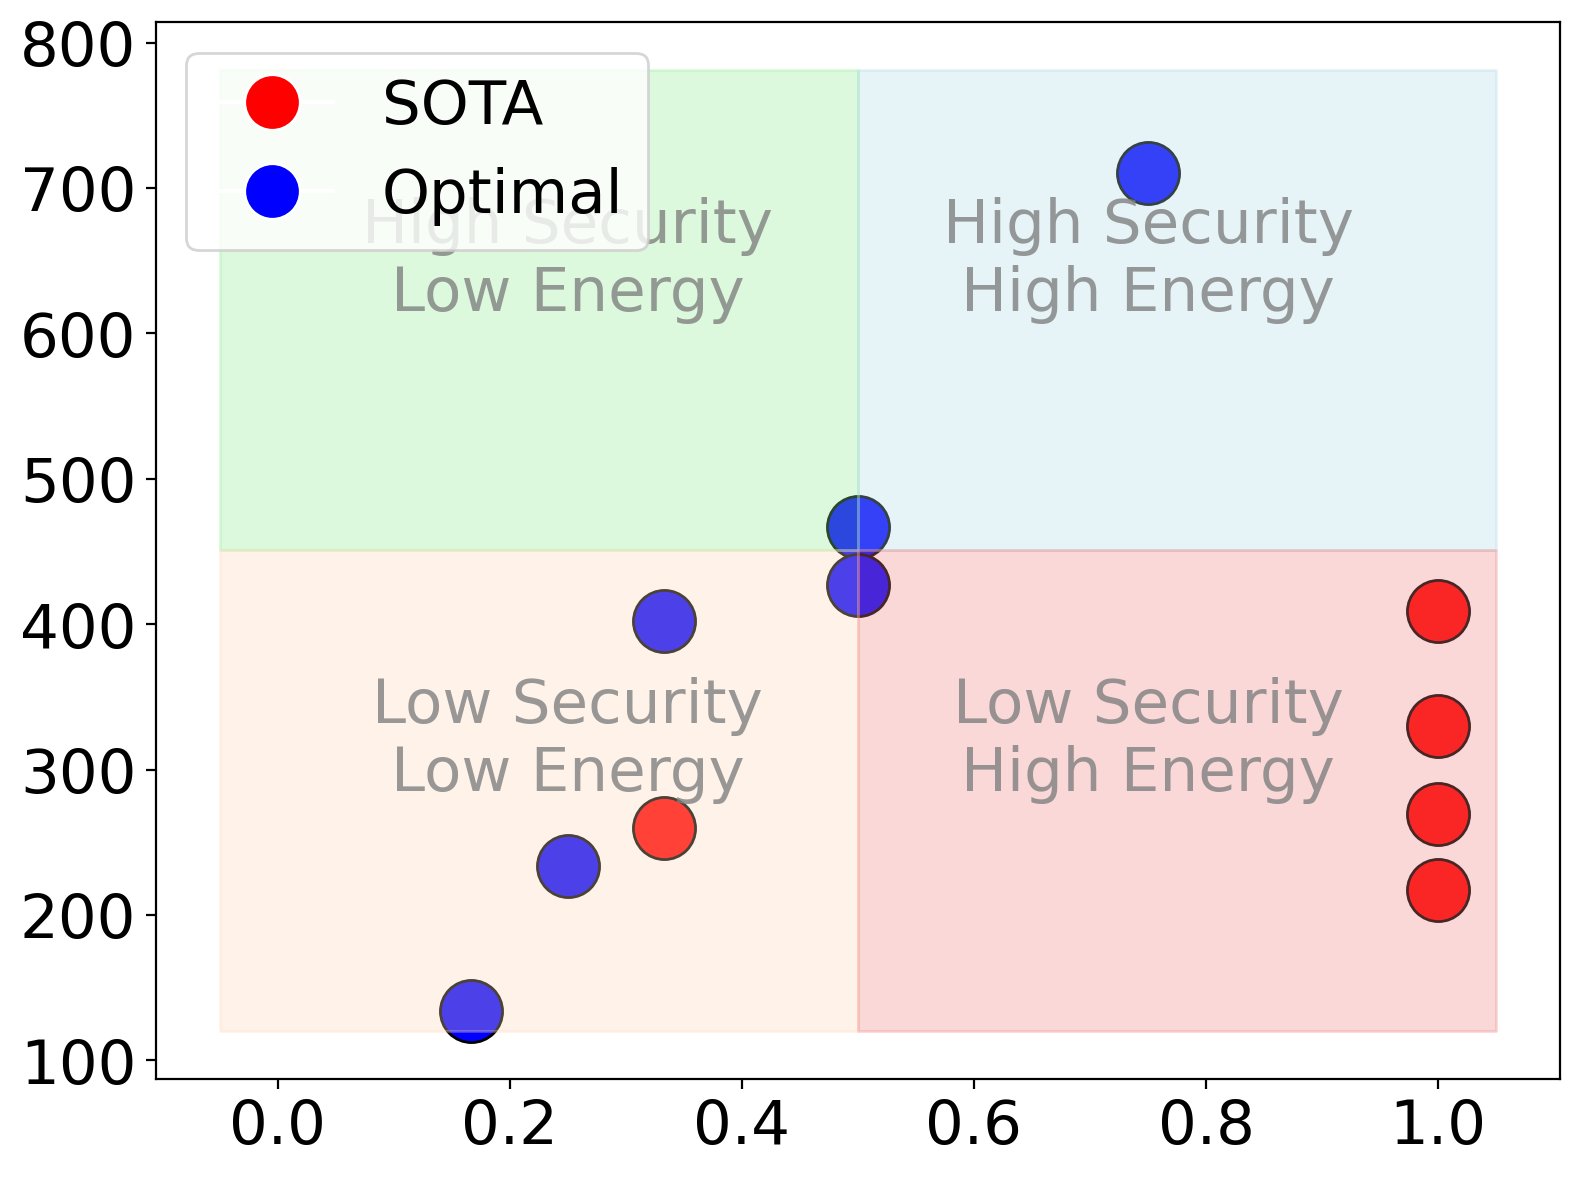

0.3


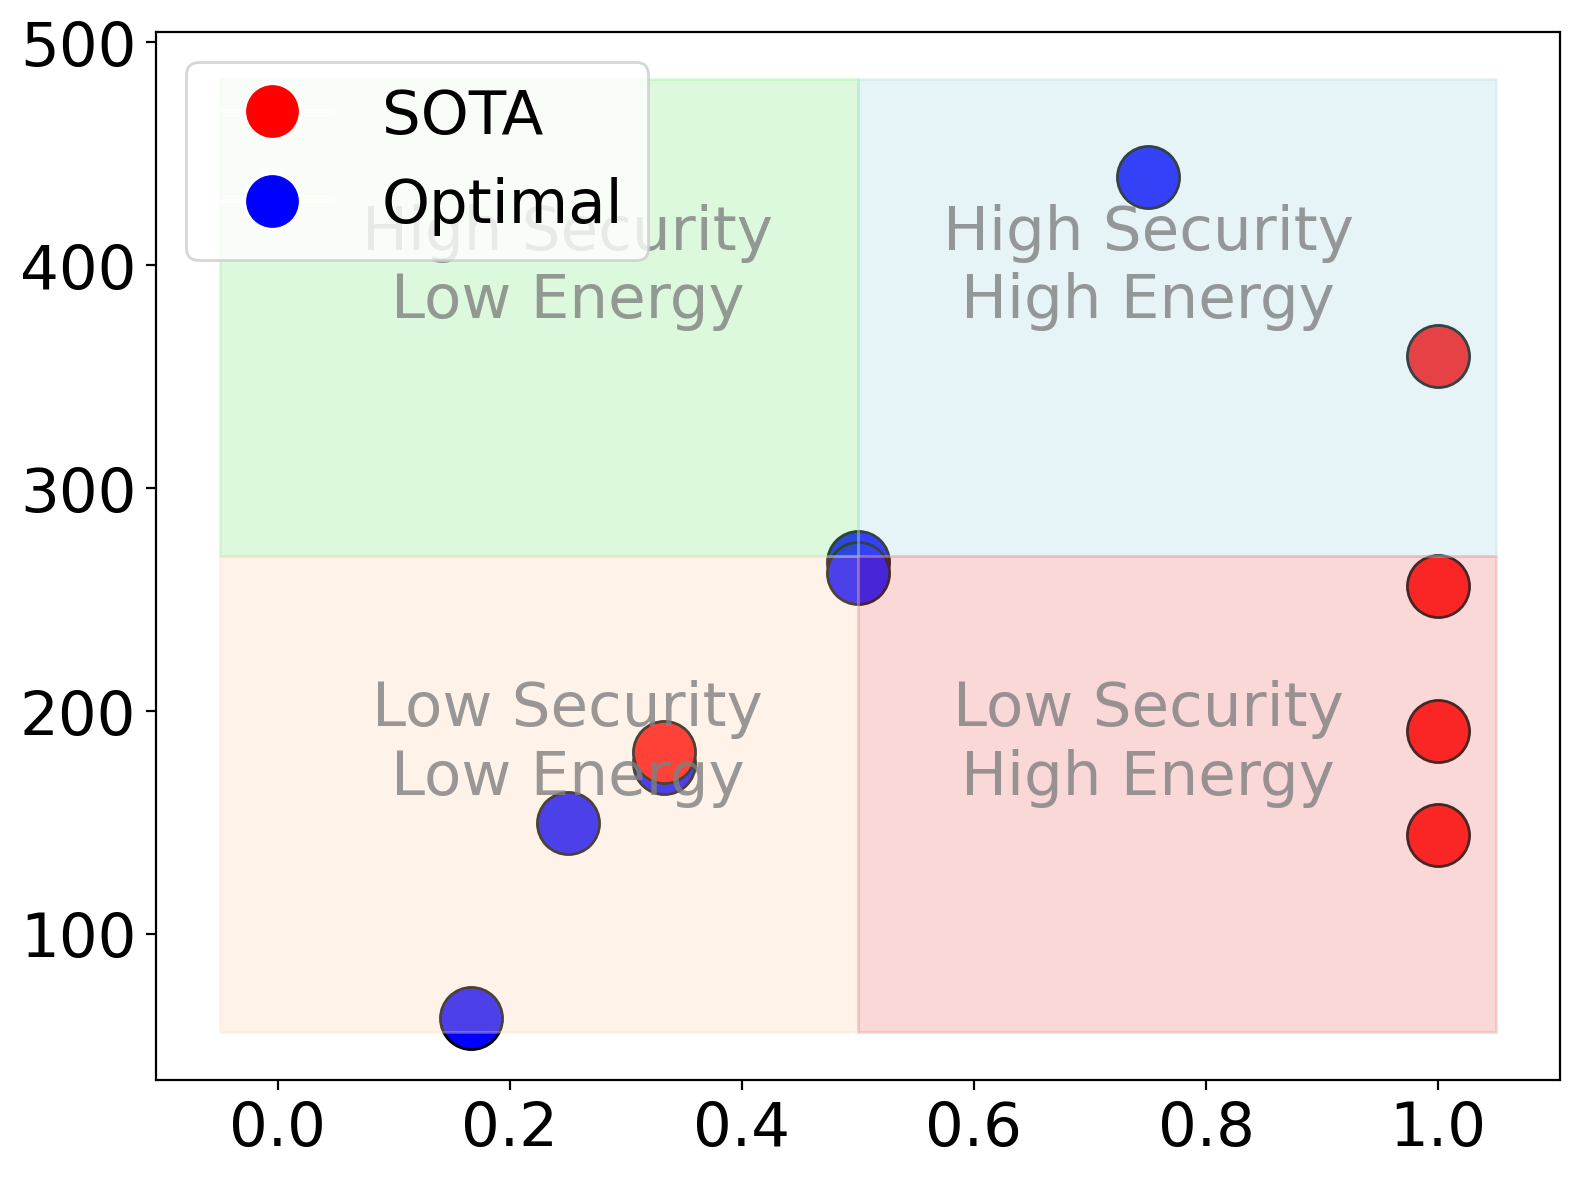

0.1


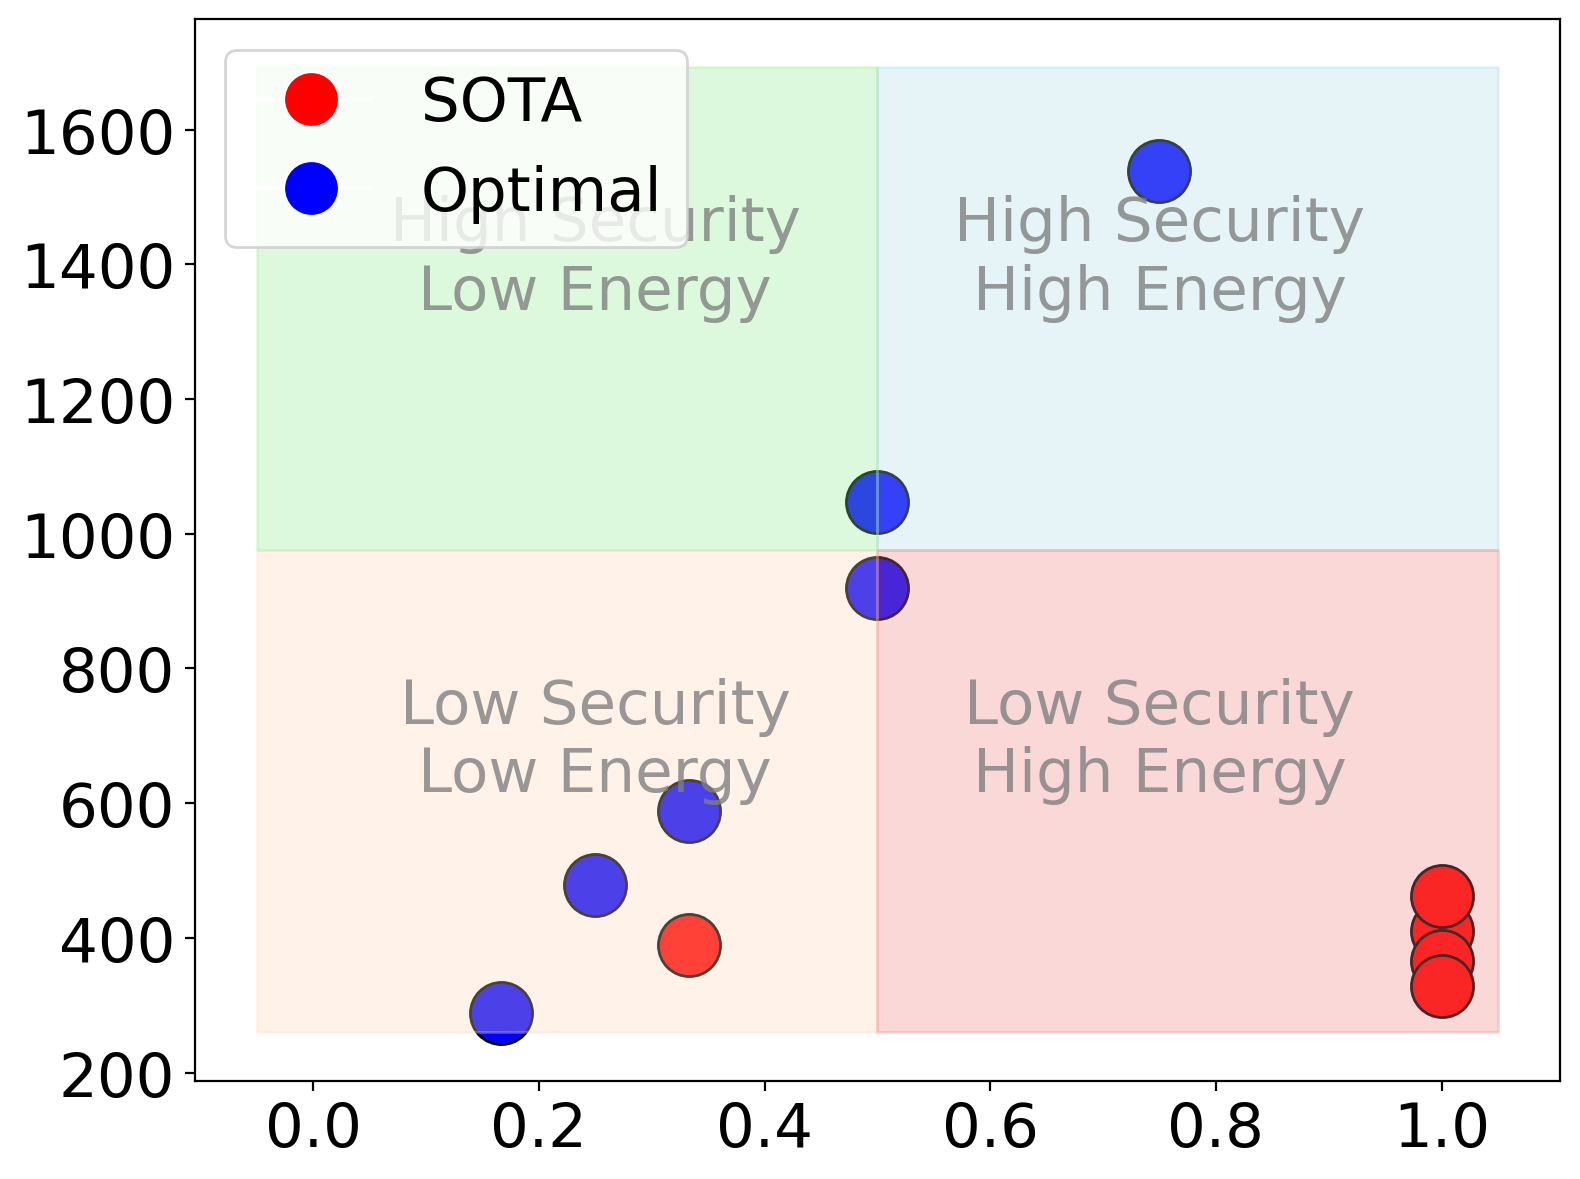

0.0


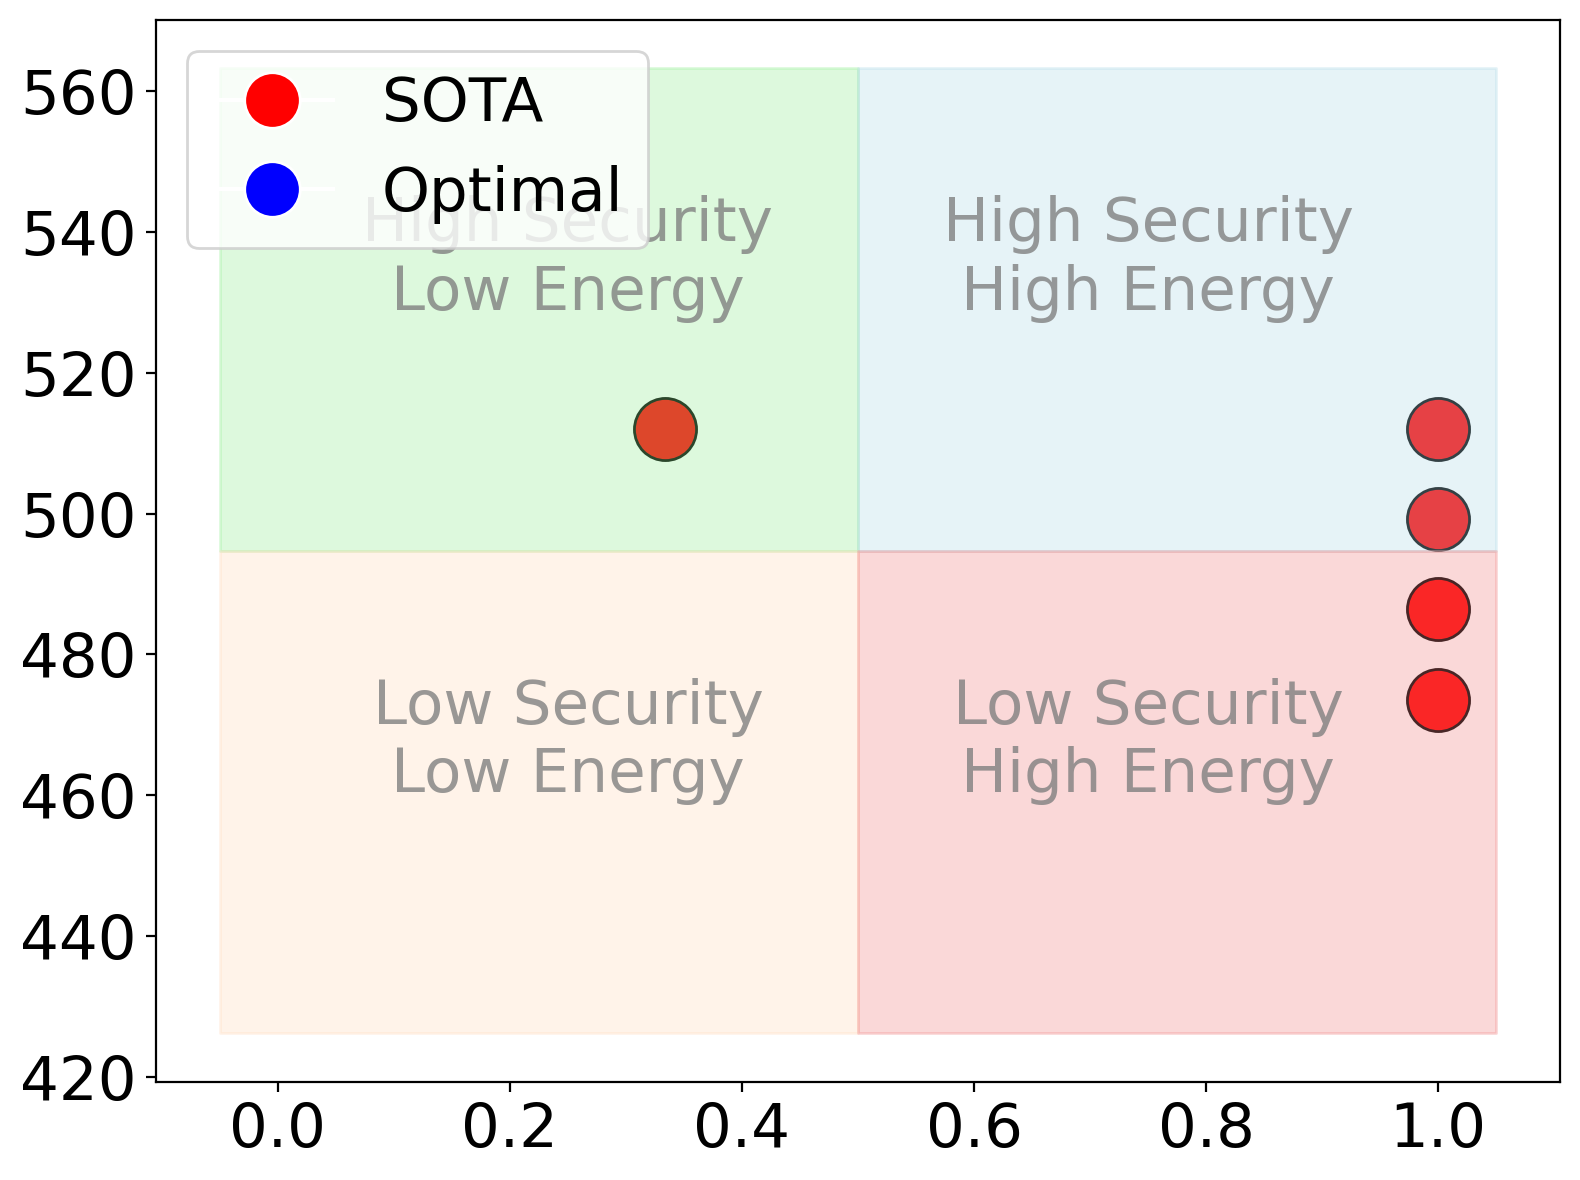

0.01


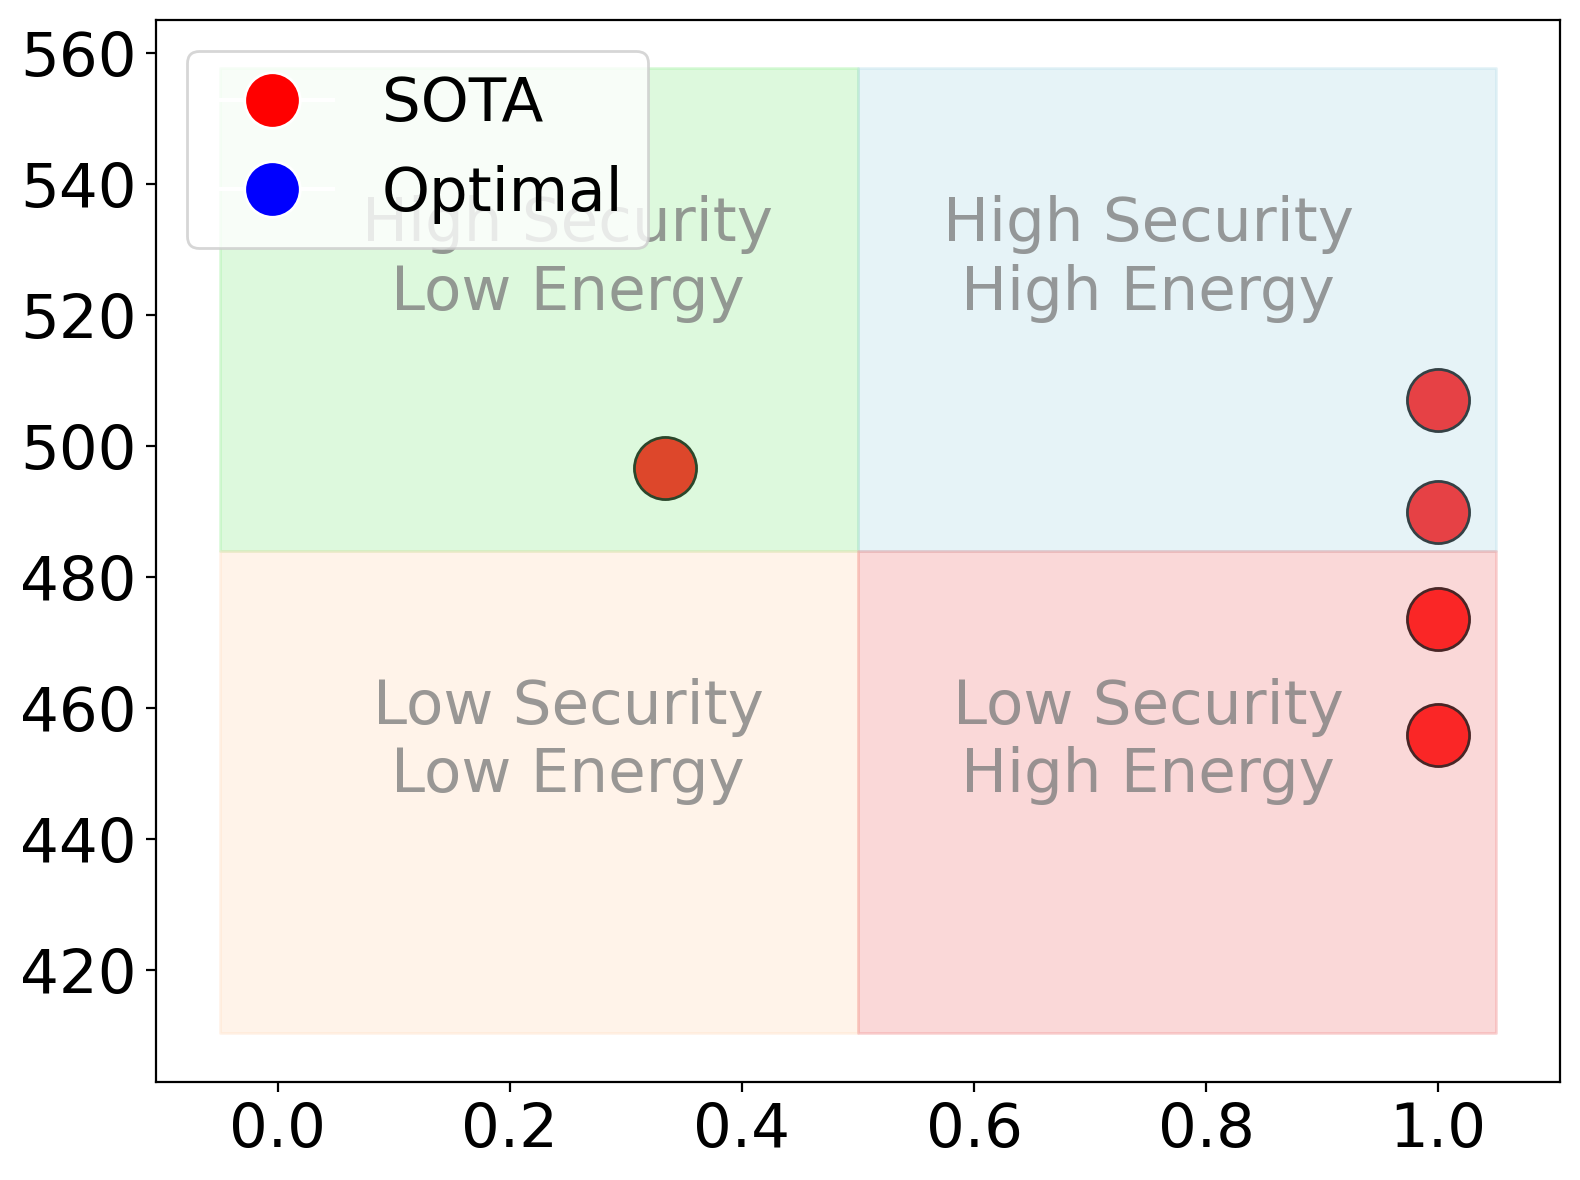

In [38]:
import matplotlib.pyplot as plt
from adjustText import adjust_text  # Import adjust_text for label adjustments

# Get unique attack rates
unique_attack_rates = df['ATTACK_PROBABILITY'].unique()

# Loop through each unique attack rate and create a separate plot
for attack_rate in unique_attack_rates:
    print(attack_rate)
    subset = df[df['ATTACK_PROBABILITY'] == attack_rate]
    
    # Extract relevant columns for this subset
    message_to_tag_ratio = subset['ratio']
    security_bits_per_message = subset['avg_verification']
    method_names = subset['X']

    # Determine dynamic ranges for background regions based on the data
    security_min = security_bits_per_message.min() - 0.1 * security_bits_per_message.min()
    security_max = security_bits_per_message.max() + 0.1 * security_bits_per_message.max()
    mid_security = (security_max + security_min) / 2

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(8, 6), dpi=200)

    # Collect all text labels for adjust_text
    texts = []

    # Plot data points with annotations for method names
    for x, y, label in zip(message_to_tag_ratio, security_bits_per_message, method_names):
        color = 'blue' if "optimal" in label else 'red'
        ax.scatter(x, y, color=color, s=500, edgecolor='black')
        
        # Process label format
        label = '\n'.join(label.split(',')[1:]) if 'optimal' in label else label
        # text = ax.text(x, y, label, fontsize=22, ha='right', va='bottom')
        # texts.append(text)  # Append each text to the texts list for adjustment

    # Set axis labels and title
    # ax.set_xlabel(r'Message to Tag Ratio $\left(\frac{t}{m}\right)$', fontsize=14)
    # ax.set_ylabel('Security (tag bits per message)', fontsize=14)
    # ax.set_title(f'Attack Rate: {attack_rate}', fontsize=16)

    # Define dynamically-scaled background colors
    ax.fill_between([-0.05, 0.5], mid_security, security_max, color='lightgreen', alpha=0.3)
    ax.fill_between([0.5, 1.05], mid_security, security_max, color='lightblue', alpha=0.3)
    ax.fill_between([-0.05, 0.5], security_min, mid_security, color='peachpuff', alpha=0.3)
    ax.fill_between([0.5, 1.05], security_min, mid_security, color='lightcoral', alpha=0.3)

    # Add region labels dynamically based on scaled values
    ax.text(0.25, mid_security + (security_max - mid_security) / 2, 'High Security\nLow Energy', color='gray', ha='center', fontsize=22, alpha=0.8)
    ax.text(0.75, mid_security + (security_max - mid_security) / 2, 'High Security\nHigh Energy', color='gray', ha='center', fontsize=22, alpha=0.8)
    ax.text(0.25, security_min + (mid_security - security_min) / 2, 'Low Security\nLow Energy', color='gray', ha='center', fontsize=22, alpha=0.8)
    ax.text(0.75, security_min + (mid_security - security_min) / 2, 'Low Security\nHigh Energy', color='gray', ha='center', fontsize=22, alpha=0.8)

    # Add legend for 'SOTA' and 'Proposed' with colors
    legend_labels = {'SOTA': 'red', 'Optimal': 'blue'}
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=20, label=label) 
                      for label, color in legend_labels.items()]
    ax.legend(handles=legend_handles, fontsize=22, loc = 'upper left')

    # Adjust text to prevent overlapping
    # adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey', lw=2.5))
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.tight_layout()
    plt.show()


0.2


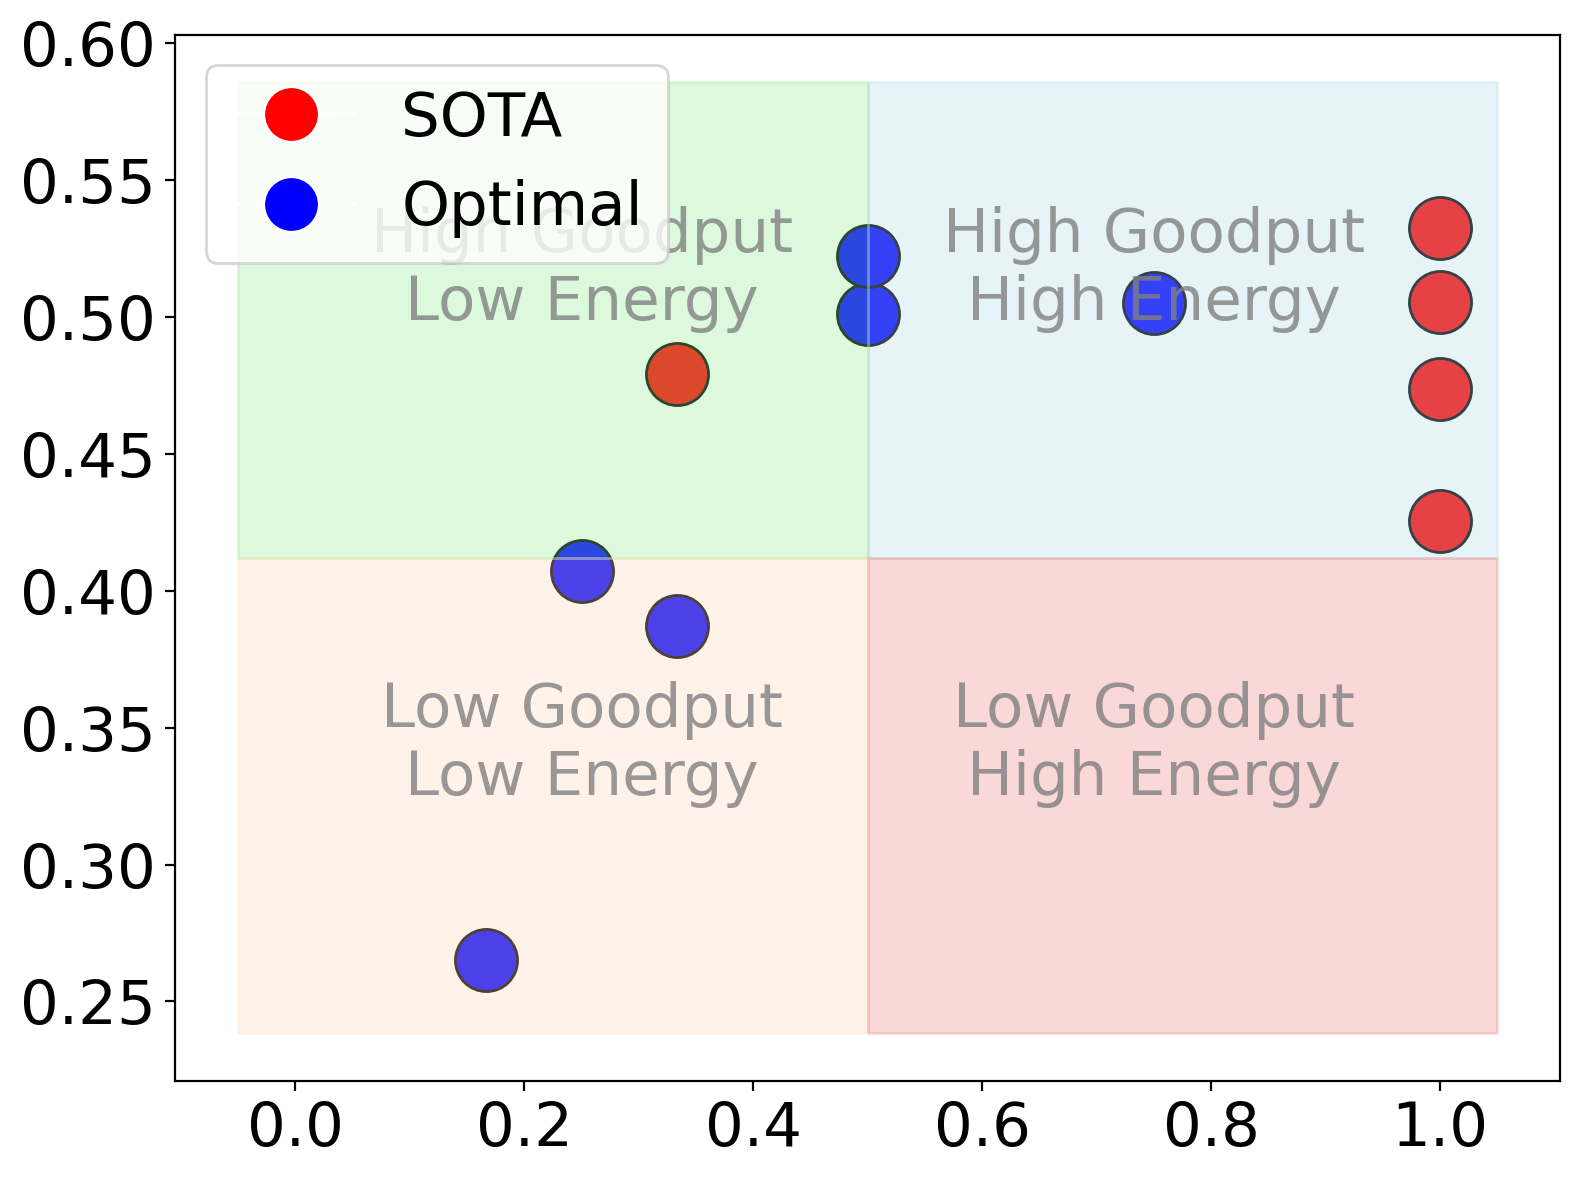

0.3


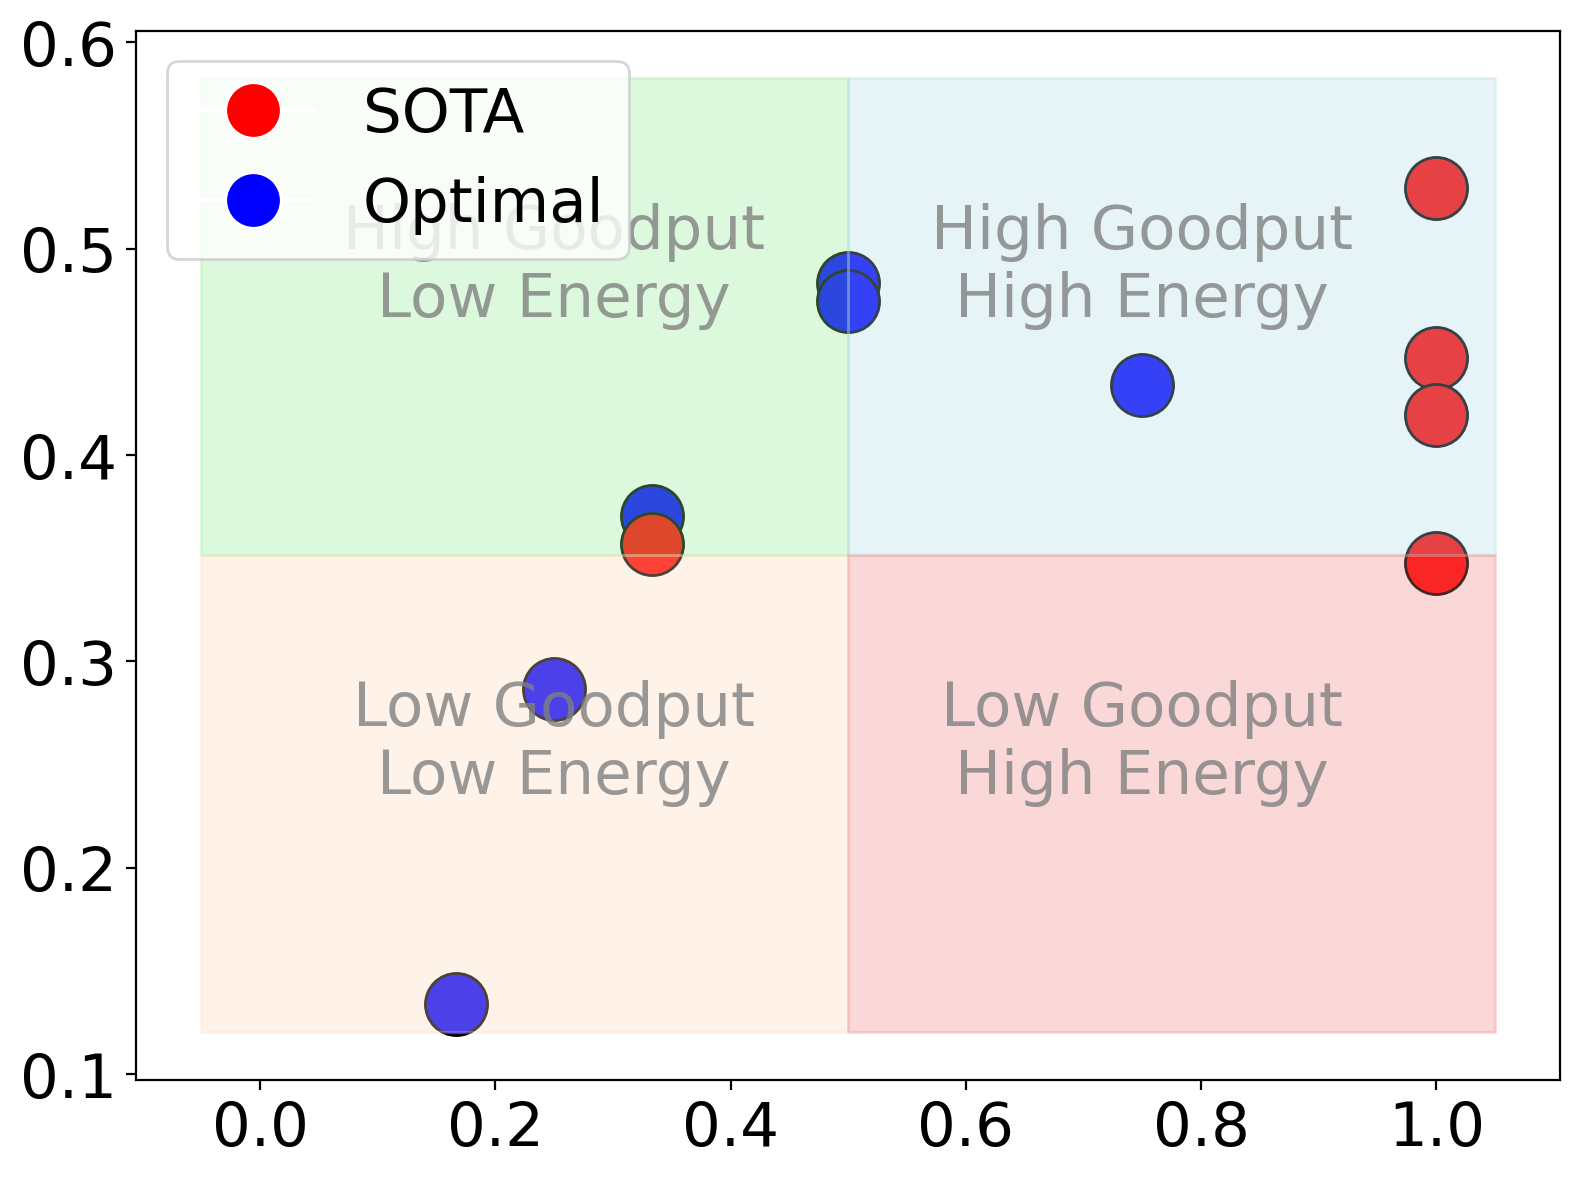

0.1


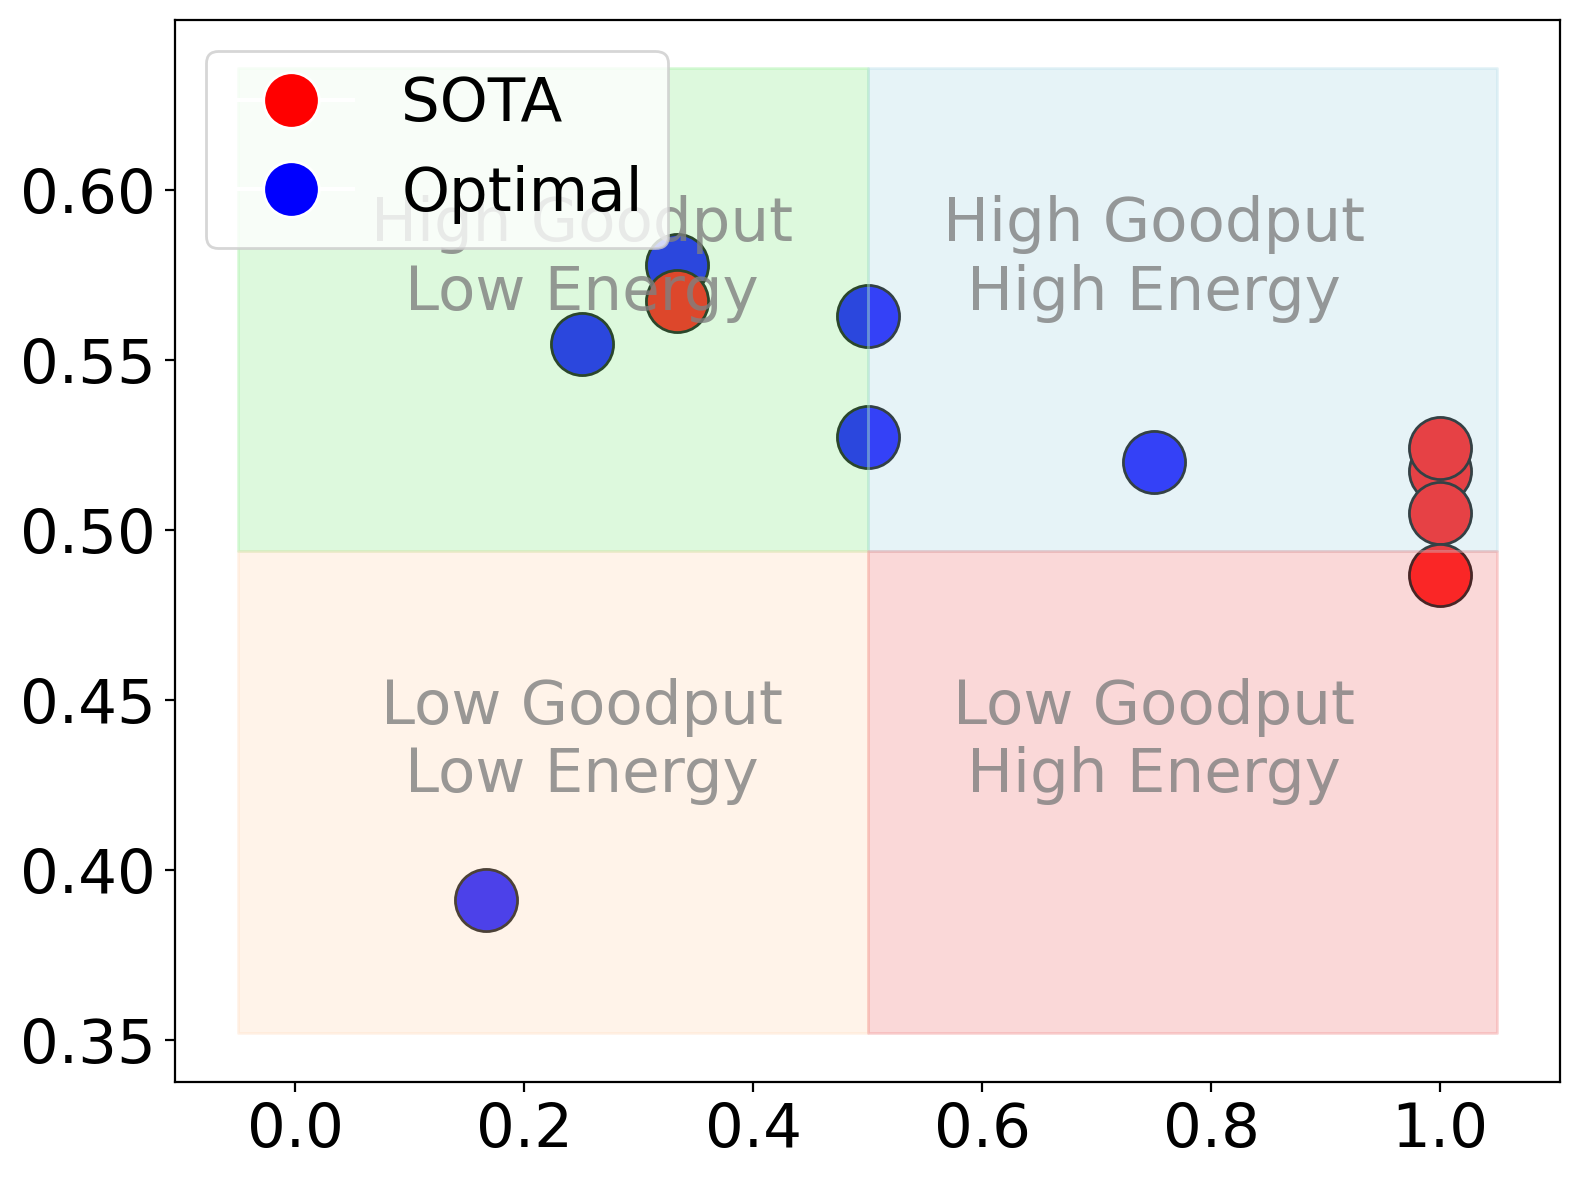

0.0


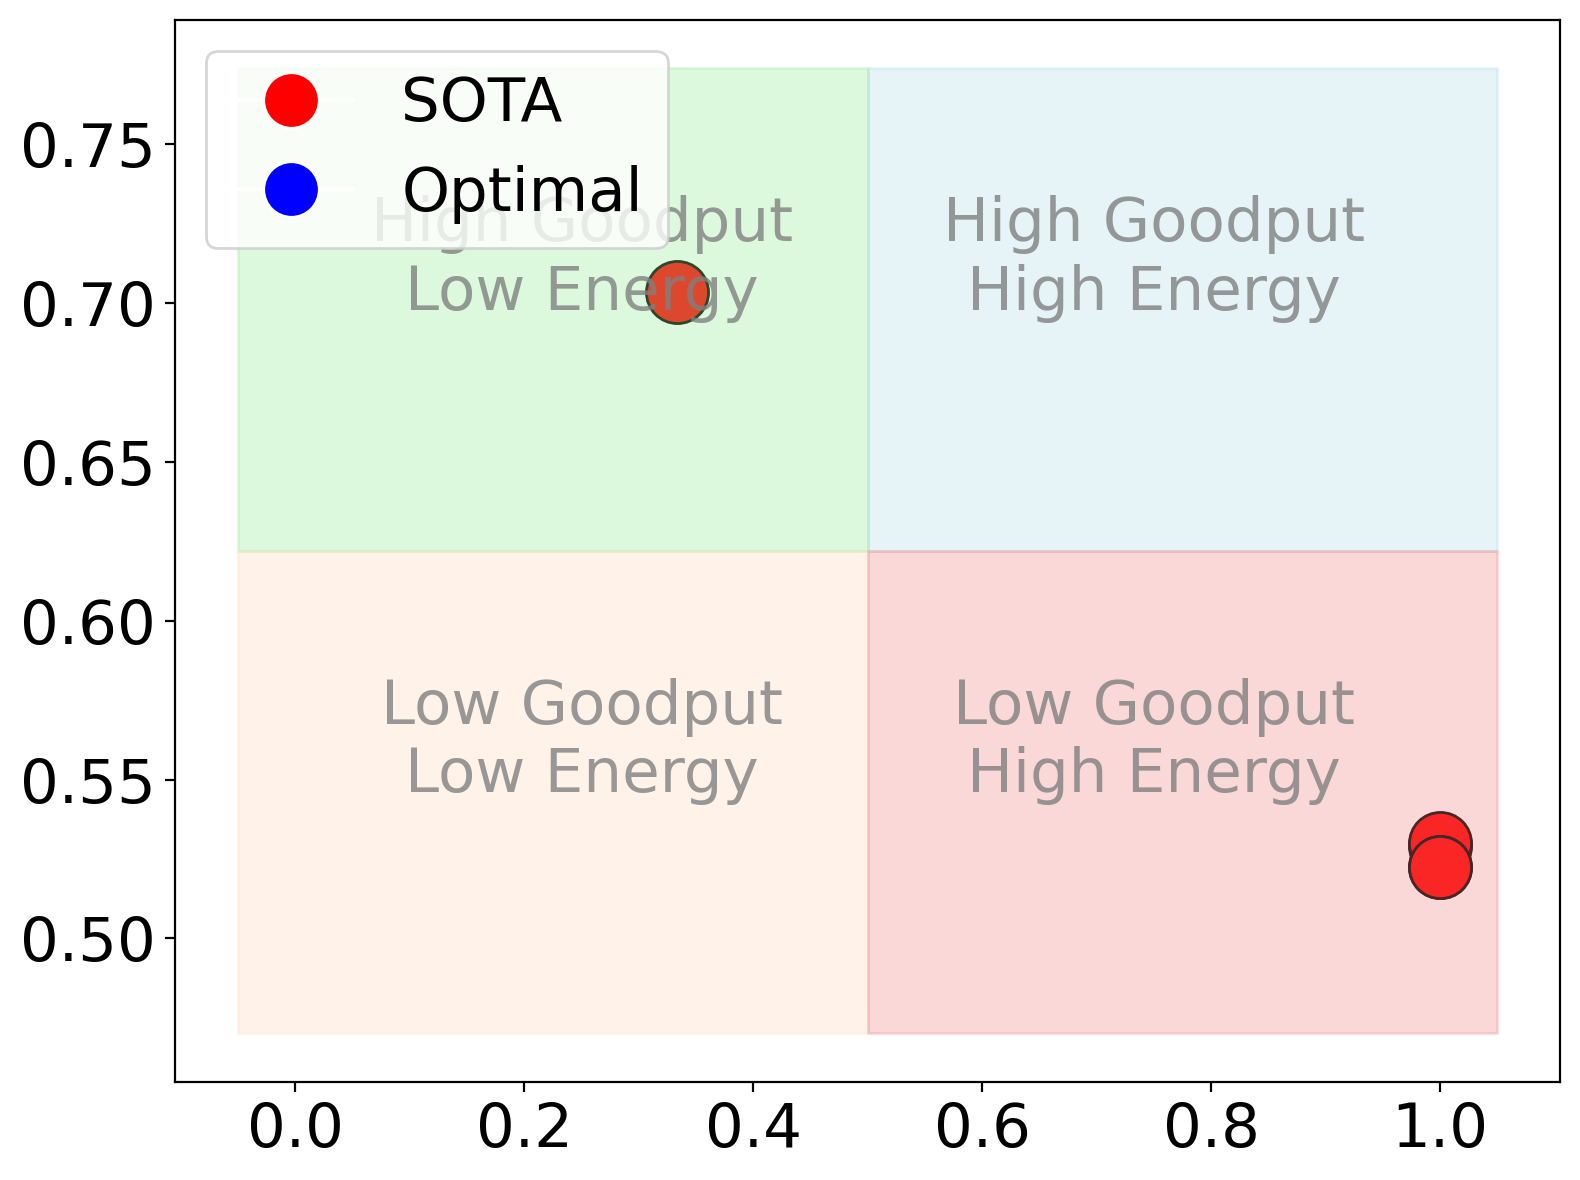

0.01


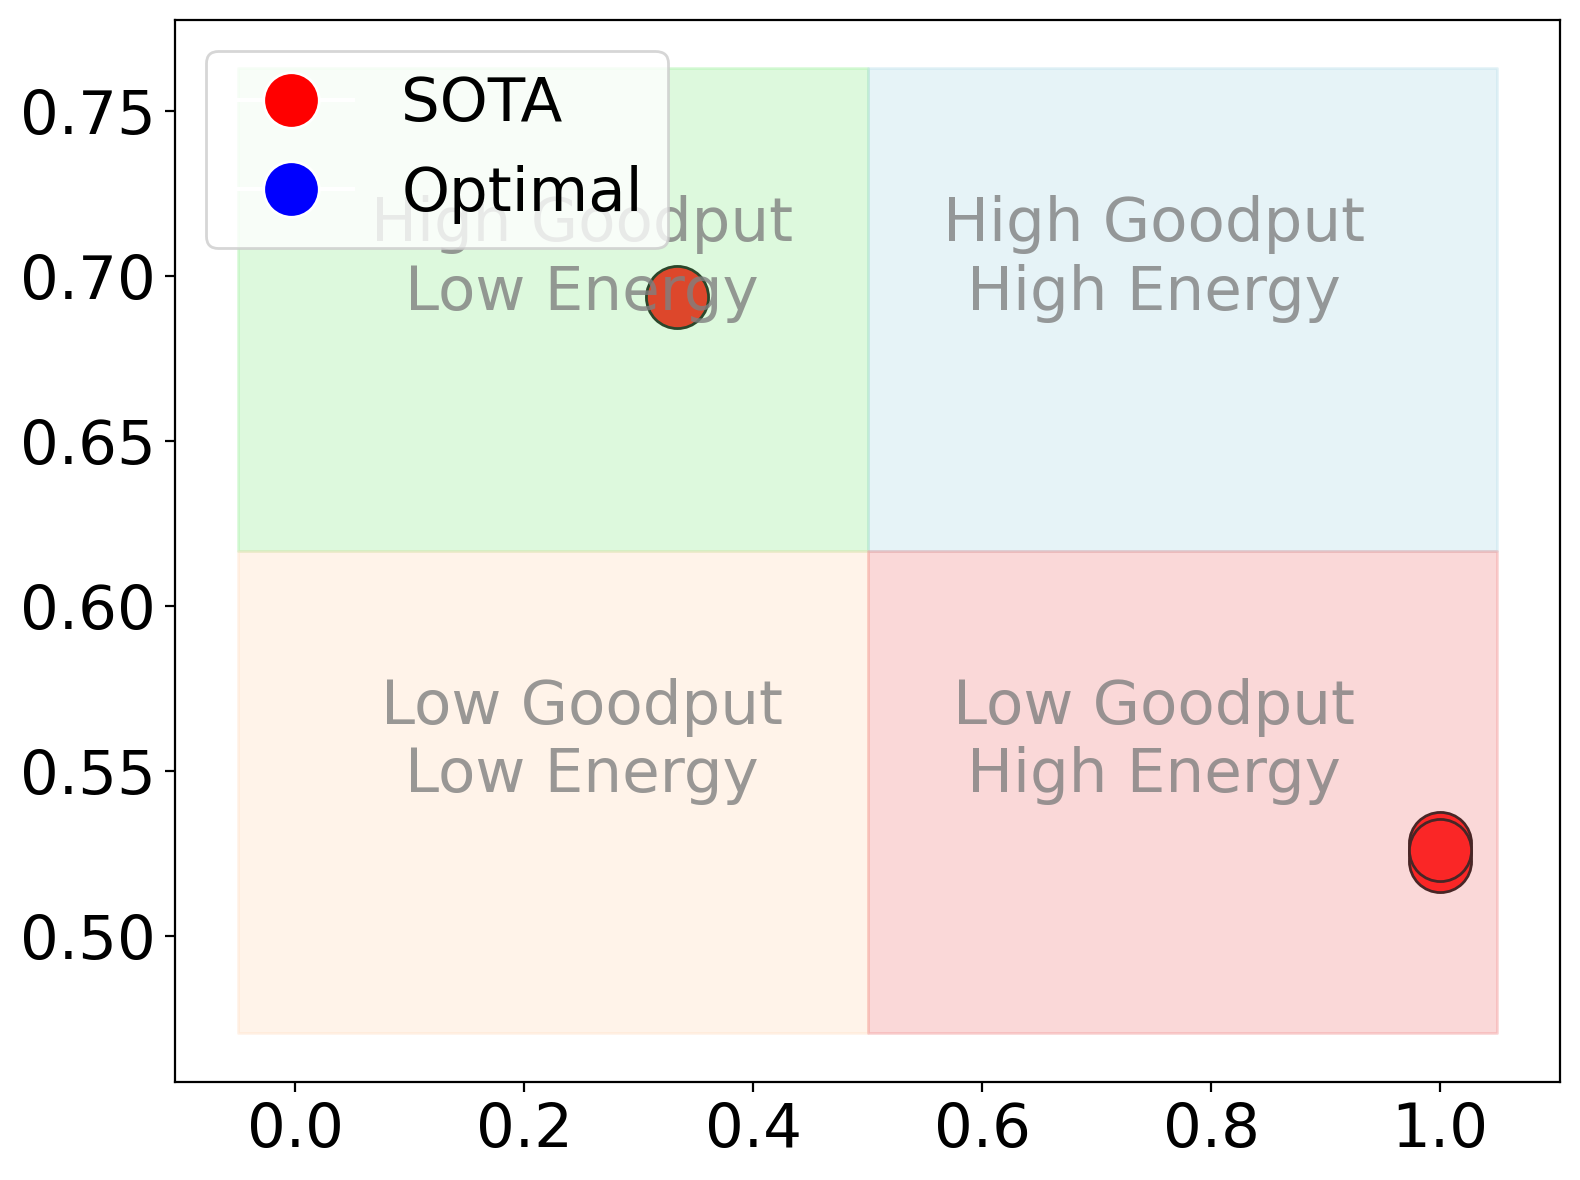

In [39]:

# Loop through each unique attack rate and create a separate plot
for attack_rate in unique_attack_rates:
    print(attack_rate)
    subset = df[df['ATTACK_PROBABILITY'] == attack_rate]
    
    # Extract relevant columns for this subset
    message_to_tag_ratio = subset['ratio']
    security_bits_per_message = subset['goodput']
    method_names = subset['X']

    # Determine dynamic ranges for background regions based on the data
    security_min = security_bits_per_message.min() - 0.1 * security_bits_per_message.min()
    security_max = security_bits_per_message.max() + 0.1 * security_bits_per_message.max()
    mid_security = (security_max + security_min) / 2

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(8, 6), dpi=200)

    # Collect all text labels for adjust_text
    texts = []

    # Plot data points with annotations for method names
    for x, y, label in zip(message_to_tag_ratio, security_bits_per_message, method_names):
        color = 'blue' if "optimal" in label else 'red'
        ax.scatter(x, y, color=color, s=500, edgecolor='black')
        
        # Process label format
        label = '\n'.join(label.split(',')[1:]) if 'optimal' in label else label
        # text = ax.text(x, y, label, fontsize=22, ha='right', va='bottom')
        # texts.append(text)  # Append each text to the texts list for adjustment

    # Set axis labels and title
    # ax.set_xlabel(r'Message to Tag Ratio $\left(\frac{t}{m}\right)$', fontsize=14)
    # ax.set_ylabel('Security (tag bits per message)', fontsize=14)
    # ax.set_title(f'Attack Rate: {attack_rate}', fontsize=16)

    # Define dynamically-scaled background colors
    ax.fill_between([-0.05, 0.5], mid_security, security_max, color='lightgreen', alpha=0.3)
    ax.fill_between([0.5, 1.05], mid_security, security_max, color='lightblue', alpha=0.3)
    ax.fill_between([-0.05, 0.5], security_min, mid_security, color='peachpuff', alpha=0.3)
    ax.fill_between([0.5, 1.05], security_min, mid_security, color='lightcoral', alpha=0.3)

    # Add region labels dynamically based on scaled values
    ax.text(0.25, mid_security + (security_max - mid_security) / 2, 'High Goodput\nLow Energy', color='gray', ha='center', fontsize=22, alpha=0.8)
    ax.text(0.75, mid_security + (security_max - mid_security) / 2, 'High Goodput\nHigh Energy', color='gray', ha='center', fontsize=22, alpha=0.8)
    ax.text(0.25, security_min + (mid_security - security_min) / 2, 'Low Goodput\nLow Energy', color='gray', ha='center', fontsize=22, alpha=0.8)
    ax.text(0.75, security_min + (mid_security - security_min) / 2, 'Low Goodput\nHigh Energy', color='gray', ha='center', fontsize=22, alpha=0.8)

    # Add legend for 'SOTA' and 'Proposed' with colors
    legend_labels = {'SOTA': 'red', 'Optimal': 'blue'}
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=20, label=label) 
                      for label, color in legend_labels.items()]
    ax.legend(handles=legend_handles, fontsize=22, loc = 'upper left')

    # Adjust text to prevent overlapping
    # adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey', lw=2.5))
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.tight_layout()
    plt.show()


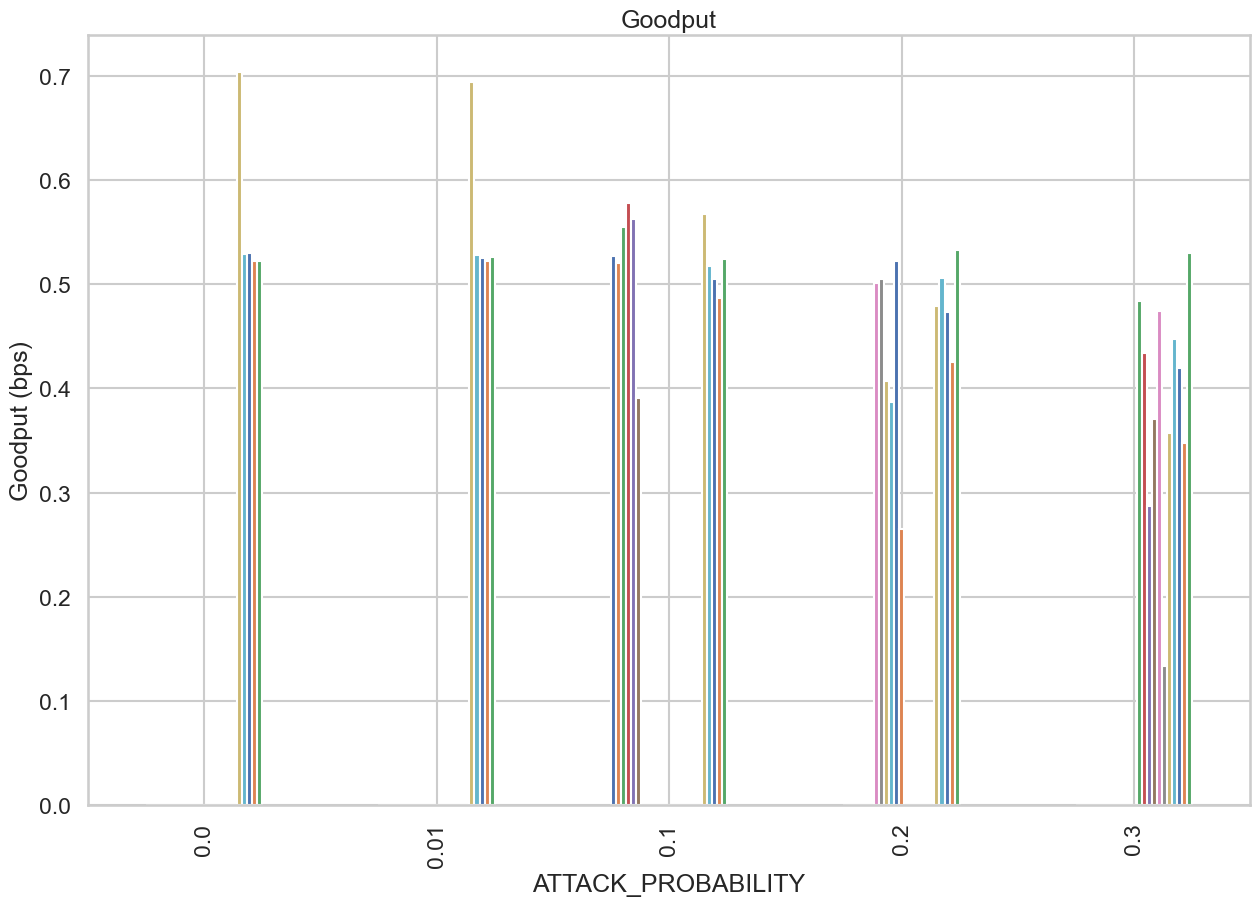

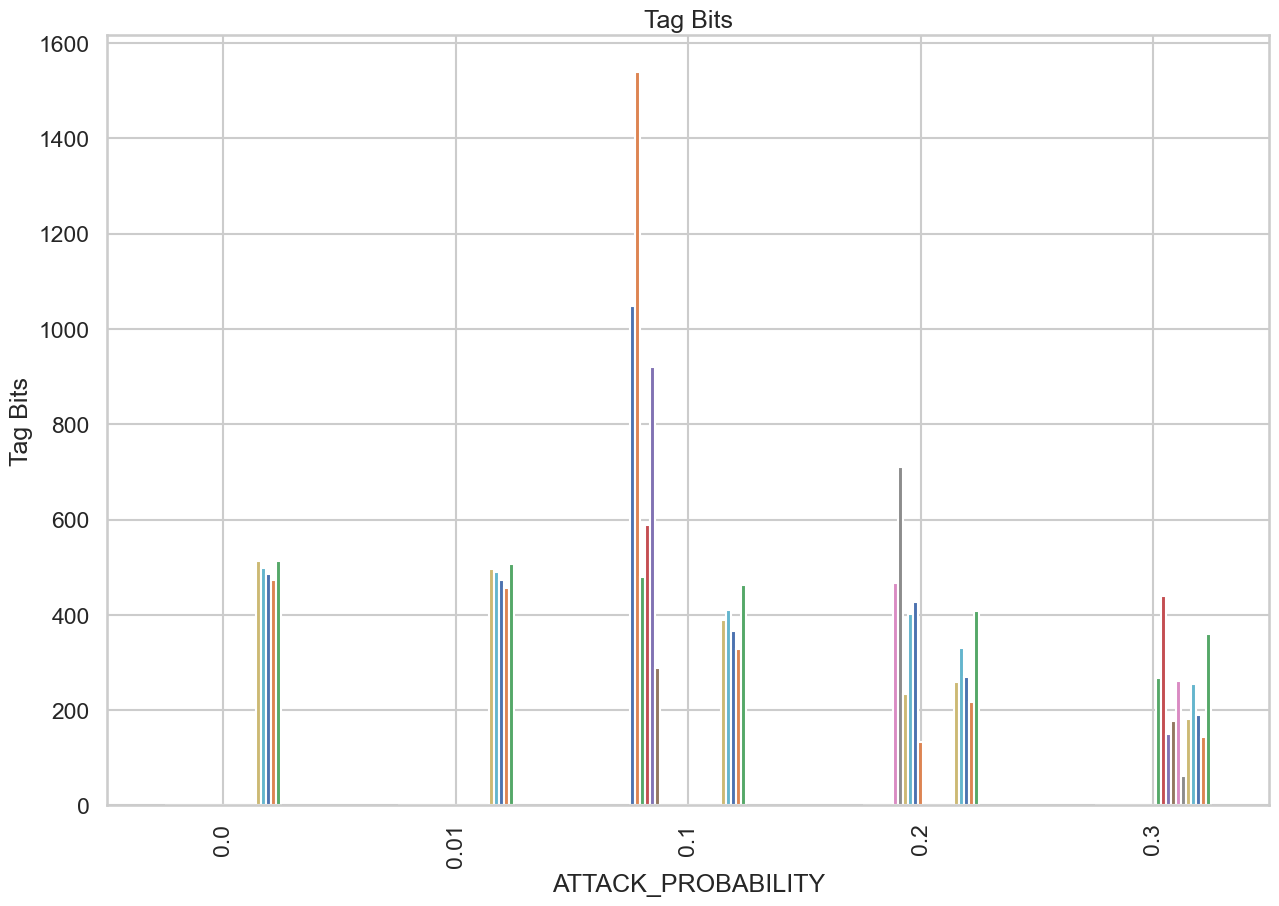

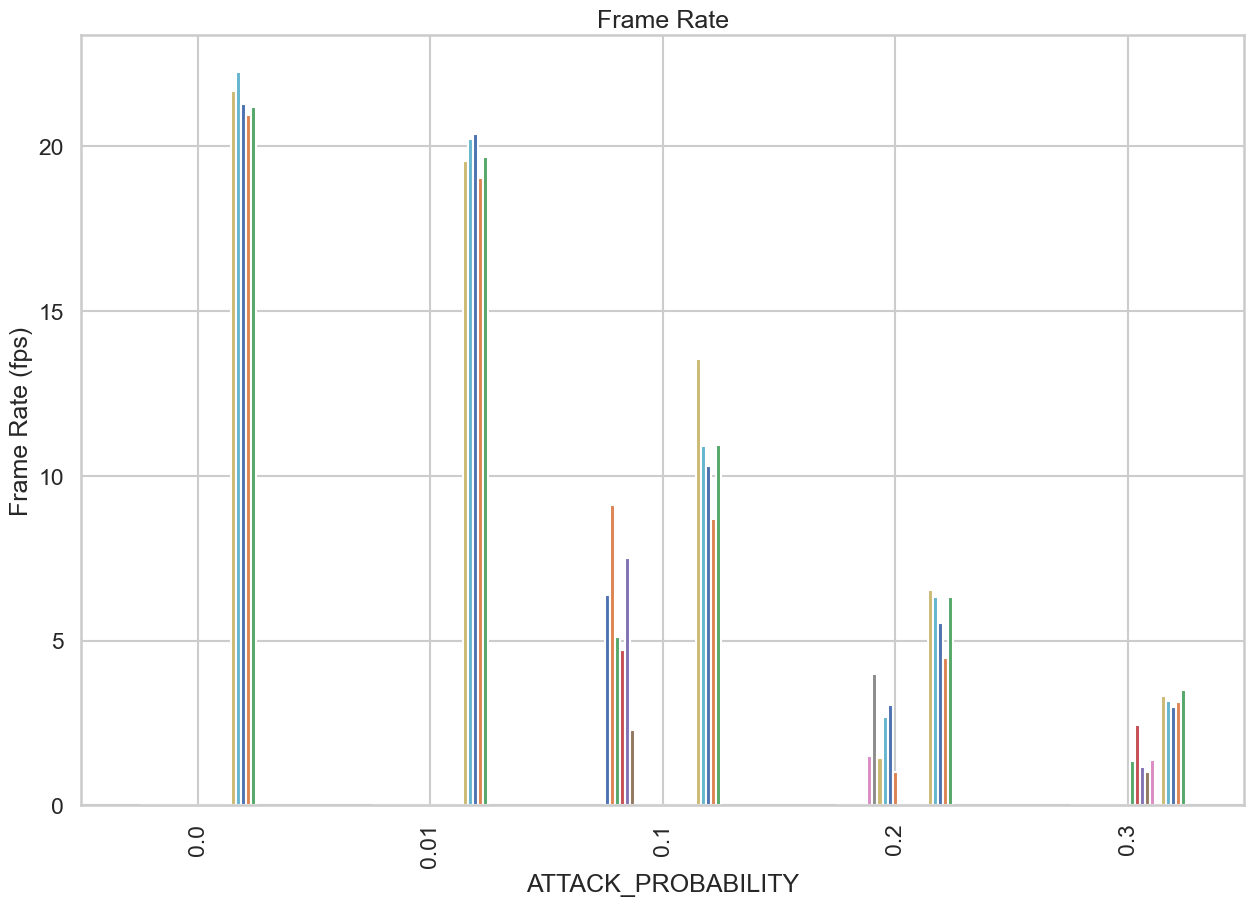

In [ ]:
# create beautiful bar charts for each of the above dataframes
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('talk')

goodput = df[['X', 'ATTACK_PROBABILITY', 'goodput']].groupby(['ATTACK_PROBABILITY', 'X']).mean()
tag_bits = df[['X', 'ATTACK_PROBABILITY', 'avg_verification']].groupby(['ATTACK_PROBABILITY', 'X']).mean()
fps = df[['X', 'ATTACK_PROBABILITY', 'frame_rate']].groupby(['ATTACK_PROBABILITY', 'X']).mean()
latency = df[['X', 'ATTACK_PROBABILITY', 'latency']].groupby(['ATTACK_PROBABILITY', 'X']).mean()

goodput.unstack().plot(kind='bar', figsize=(15, 10), title='Goodput')
# remove the legend
plt.legend().set_visible(False)
# color the first 4 columns with the same color
plt.ylabel('Goodput (bps)')
plt.show()

tag_bits.unstack().plot(kind='bar', figsize=(15, 10), title='Tag Bits')
plt.legend().set_visible(False)

plt.ylabel('Tag Bits')
plt.show()

fps.unstack().plot(kind='bar', figsize=(15, 10), title='Frame Rate')
plt.legend().set_visible(False)

plt.ylabel('Frame Rate (fps)')
plt.show()

# latency.unstack().plot(kind='bar', figsize=(15, 10), title='Latency')
# plt.legend().set_visible(False)

# plt.ylabel('Latency (s)')
# plt.show()



In [ ]:

with open('results.pkl', 'rb') as f:
    res = pickle.load(f)
print(res[0]['param'].keys())

df2 = pd.DataFrame([[np.array(res[data]['param']['X']),
                        res[data]['param']['DIGESTMOD'],
                        res[data]['param']['QUALITY'],
                        res[data]['param']['PAYLOAD_SIZE_BYTE'],
                        res[data]['param']['ATTACK_PROBABILITY'],
                        np.nanmean(res[data]['goodput']), 
                        np.nanmean(res[data]['avg_verification']), 
                        np.nanmean(res[data]['latency']) - res[data]['param']['OFFSET'], 
                        np.nanmean(res[data]['frame_rate']) ] for data in res.keys()]
                        , columns=['X', 'DIGESTMOD', 'QUALITY', 'PAYLOAD_SIZE_BYTE', 'ATTACK_PROBABILITY', 'goodput', 'avg_verification', 'latency', 'frame_rate'])
for i in range(len(df2)):
    if "[[0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0]\n [1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0]\n [1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0]\n [0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]\n [0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0]\n [0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0]\n [1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0]\n [1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0]\n [1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1]\n [0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0]\n [0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1]\n [1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0]\n [0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0]\n [0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0]\n [0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1]\n [0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1]\n [0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0]\n [0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1]\n [0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0]\n [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]]" == str(np.array(df2['X'][i], dtype=int)):
        print(i)
        break



dict_keys(['X', 'Y', 'KEY', 'DIGESTMOD', 'PAYLOAD_SIZE_BYTE', 'QUALITY', 'ATTACK_PROBABILITY', 'DURATION', 'DELAY', 'OFFSET'])


/var/folders/1r/ph1yw3353jb398m67yh849kc0000gn/T/ipykernel_55446/1243847977.py:13: RuntimeWarning: Mean of empty slice
  np.nanmean(res[data]['frame_rate']) ] for data in res.keys()]
/var/folders/1r/ph1yw3353jb398m67yh849kc0000gn/T/ipykernel_55446/1243847977.py:12: RuntimeWarning: Mean of empty slice
  np.nanmean(res[data]['latency']) - res[data]['param']['OFFSET'],


/var/folders/1r/ph1yw3353jb398m67yh849kc0000gn/T/ipykernel_55446/3550458631.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=df, x="X", y="goodput", palette="Set1", linewidth=2.5, width=0.5)


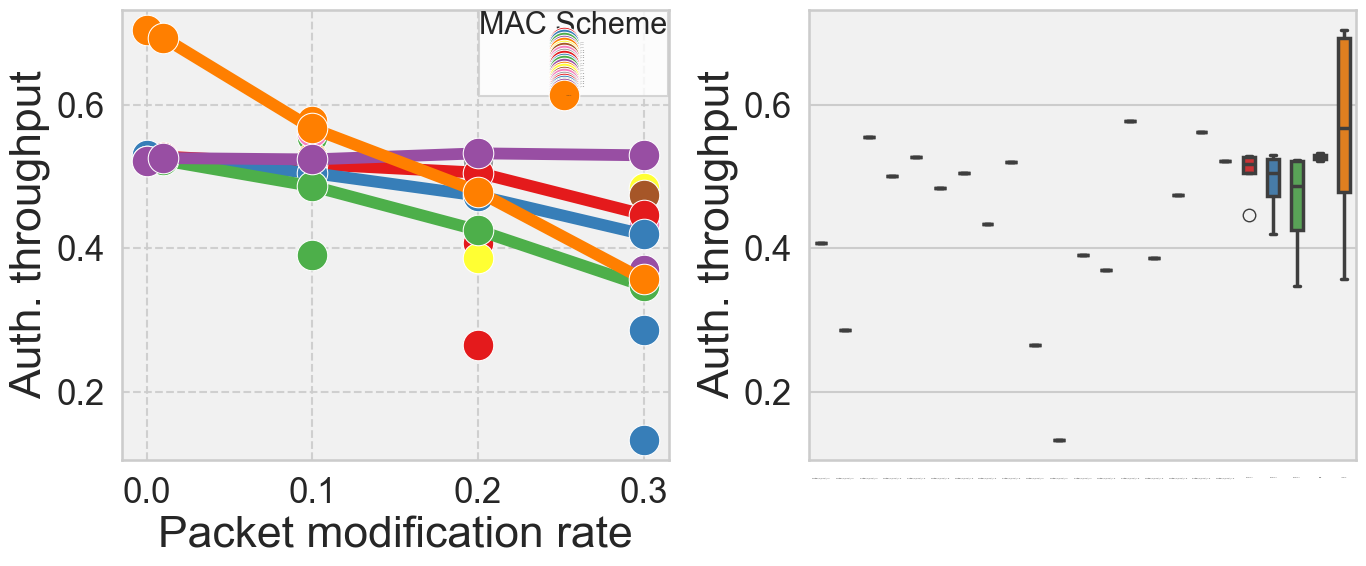

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the seaborn style for a polished look
# sns.set(style="whitegrid")

# Initialize the figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# create a dark background
# fig.patch.set_facecolor('black')
axes[0].set_facecolor("#f1f1f1")
axes[1].set_facecolor("#f1f1f1")




axes[0].yaxis.set_tick_params(labelsize=25)
axes[0].xaxis.set_tick_params(labelsize=25)

# 1. Line plot with confidence intervals using Seaborn
sns.lineplot(ax=axes[0], data=df, x="ATTACK_PROBABILITY", y="goodput", hue="X", marker="o", linewidth=8.5, markersize=22, palette="Set1")
# axes[0].set_title("Goodput by Attack Probability", fontsize=25)

axes[0].set_xlabel("Packet modification rate", fontsize=32)
axes[0].set_ylabel("Auth. throughput", fontsize=32)
axes[0].legend(title="MAC Scheme", title_fontsize="22", fontsize=".1", loc="upper right")

axes[0].grid(True, linestyle="--", alpha=0.9)


# 2. Box plot to show distribution of goodput across different schemes
sns.boxplot(ax=axes[1], data=df, x="X", y="goodput", palette="Set1", linewidth=2.5, width=0.5) 
axes[1].yaxis.set_tick_params(labelsize=25)
axes[1].xaxis.set_tick_params(labelsize=.1)
# axes[1].set_title("Goodput Distribution Across MAC Schemes", fontsize=24)
# axes[1].set_xlabel("MAC Scheme", fontsize=32)
axes[1].set_ylabel("Auth. throughput", fontsize=32)
plt.xlabel("")

plt.tight_layout()
plt.show()

